In [1]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


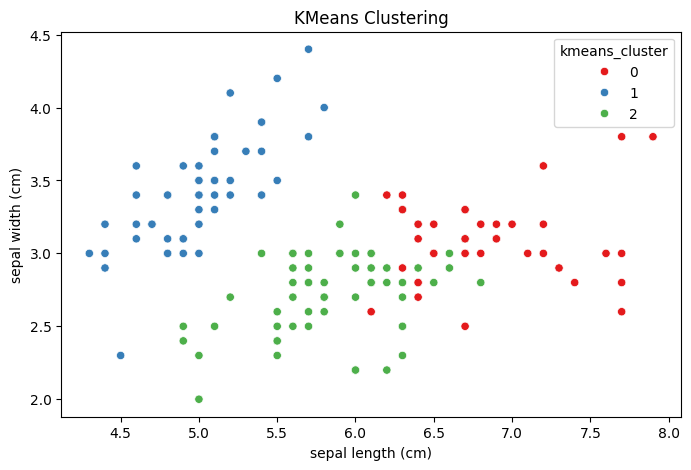

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)


plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='kmeans_cluster', palette='Set1')
plt.title('KMeans Clustering')
plt.show()

KMeans is a centroid-based clustering algorithm. It partitions data into k clusters by minimizing the variance within each cluster. The algorithm follows these steps:

1. Choose the number of clusters k.


2. Randomly initialize k centroids.


3. Assign each point to the nearest centroid.


4. Recalculate centroids as the mean of all points in a cluster.


the Iris dataset contains continuous features that are well-suited to distance-based clustering. Since there are 3 known species, applying KMeans with k=3 is a logical approach to see if the algorithm can identify natural groupings.

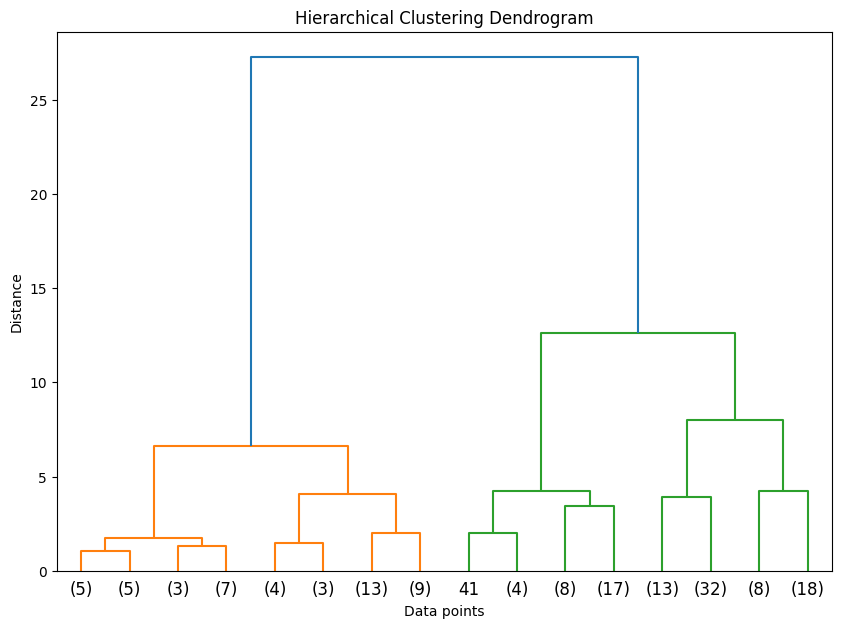

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :4])

# Create linkage matrix
linked = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

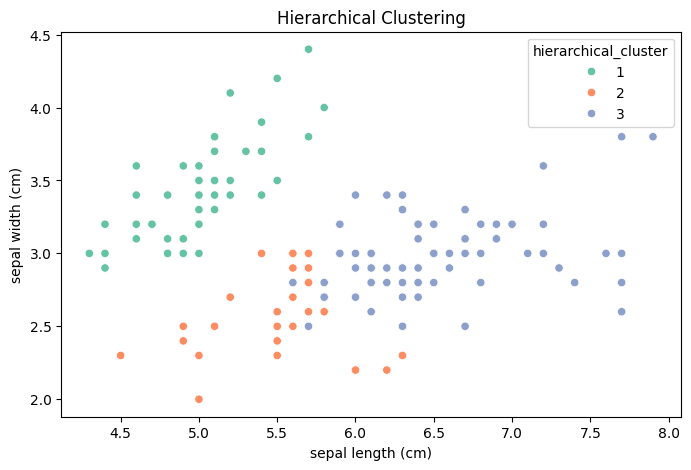

In [5]:
from scipy.cluster.hierarchy import fcluster

# Assign cluster labels
df['hierarchical_cluster'] = fcluster(linked, 3, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='hierarchical_cluster', palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
Hierarchical clustering builds a tree (dendrogram) to represent data groupings. There are two types:

Agglomerative (bottom-up): Start with each point as its own cluster, then merge closest clusters iteratively.

Divisive (top-down): Start with one cluster and recursively split it.

The Iris dataset is small and well-structured, making it suitable for hierarchical clustering which is computationally expensive. It also helps to visualize how clusters are formed at each step via a dendrogram.